In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def get_result(name):
    acc_curve = []
    auc_curve = []
    feature_curve = []
    for i in range(1,6):
        with open(f'./result/{name}_{i}.pkl','rb') as file:
            i_th_result = pickle.load(file)
            acc_curve.append(i_th_result['acc'])
            auc_curve.append(i_th_result['auc'])
            feature_curve.append(i_th_result['feat'])
    return acc_curve, auc_curve, feature_curve

In [130]:
def get_result_feature_nn(name):
    acc_curve = []
    auc_curve = []
    repeat_times = 6 if name=='feature_DT_results' else 2
    for i in range(1,repeat_times):
        with open(f'./result/{name}_{i}.pkl','rb') as file:
            i_th_result = pickle.load(file)
            acc_curve.append(i_th_result['acc'])
            auc_curve.append(i_th_result['auc'])
            # feature_curve.append(i_th_result['feat'])
    return acc_curve, auc_curve

In [137]:

with open(f'./result/feature_DT_results_{2}.pkl','rb') as file:
    i_th_result = pickle.load(file)
    print(i_th_result['acc'])
    print(i_th_result['auc'])
    # feature_curve.append(i_th_result['feat'])

[0.7197397658556, 0.7329283526979671, 0.7300706412991809, 0.7149557248195275, 0.7201460362382126, 0.7204113556717557, 0.7180068983052721, 0.7160805686679859, 0.7215444907525121, 0.7176282653636534, 0.7323921863426821, 0.7323894225985828, 0.707225532573488, 0.7283350100047536, 0.7223404490531413, 0.7191400333860287]
[0.7408298970781696, 0.7686953469604343, 0.7730910819505401, 0.7643825242933107, 0.7751058513990071, 0.780521407961794, 0.7780906950263661, 0.7625280520026091, 0.751499331173928, 0.7660255701604077, 0.7832132947146158, 0.7866196093171341, 0.7647887946759233, 0.787295344749439, 0.7746774710635993, 0.7623041887305572]


# post XAI result

In [8]:
name = 'Deep Lift'
DL_acc, DL_auc, DL_feat = get_result(name)

In [9]:
name = 'Feature Ablation'
FA_acc, FA_auc, FA_feat = get_result(name)

In [10]:
name = 'Integrated Gradients'
IG_acc, IG_auc, IG_feat = get_result(name)

In [11]:
name = 'Saliency'
SA_acc, SA_auc, SA_feat = get_result(name)

In [81]:
name = 'linear'
Linear_acc, Linear_auc, Linear_feat = get_result(name)

In [95]:
name = 'DT'
DT_acc, DT_auc, DT_feat = get_result(name)

In [147]:
name = 'SVM'
SVM_acc, SVM_auc, SVM_feat = get_result(name)

In [163]:
name = 'feature_linear_results'
lin_nn_acc, lin_nn_auc = get_result_feature_nn(name)

In [164]:
name = 'feature_SVM_results'
SVM_nn_acc, SVM_nn_auc = get_result_feature_nn(name)

In [165]:
name = 'feature_DT_results'
DT_nn_acc, DT_nn_auc = get_result_feature_nn(name)

In [122]:
SVM_feat[0][-1]

array([ 13,  16, 276])

In [123]:
arrays = [DL_feat, FA_feat, IG_feat, SA_feat,Linear_feat,DT_feat,SVM_feat]
labels = ['DL', 'FA', 'IG', 'SA','Linear','DT','SVM']
for i in range(len(arrays)):
    for j in range(0,5):
        # print(labels[i])
        method = arrays[i]
        print(f'{labels[i]},{j+1}s attempt,feat: {method[j][-1]}')

DL,1s attempt,feat: [  1  62 193]
DL,2s attempt,feat: [ 0  1 79]
DL,3s attempt,feat: [ 0  1 62]
DL,4s attempt,feat: [ 0  1 62]
DL,5s attempt,feat: [ 0  1 62]
FA,1s attempt,feat: [ 1 23 62]
FA,2s attempt,feat: [ 0  1 62]
FA,3s attempt,feat: [ 0  1 62]
FA,4s attempt,feat: [ 1 62 79]
FA,5s attempt,feat: [ 1 23 62]
IG,1s attempt,feat: [ 1 24 62]
IG,2s attempt,feat: [ 1 62 76]
IG,3s attempt,feat: [ 0  1 62]
IG,4s attempt,feat: [ 1 63 79]
IG,5s attempt,feat: [ 1 62 63]
SA,1s attempt,feat: [329 330 331]
SA,2s attempt,feat: [190 331 341]
SA,3s attempt,feat: [175 331 341]
SA,4s attempt,feat: [190 329 331]
SA,5s attempt,feat: [328 331 364]
Linear,1s attempt,feat: [284 328 368]
Linear,2s attempt,feat: [284 328 368]
Linear,3s attempt,feat: [284 328 368]
Linear,4s attempt,feat: [284 328 368]
Linear,5s attempt,feat: [284 328 368]
DT,1s attempt,feat: [  1 182 368]
DT,2s attempt,feat: [  1 182 368]
DT,3s attempt,feat: [  1 182 368]
DT,4s attempt,feat: [  1 182 368]
DT,5s attempt,feat: [  1 182 368]
SV

In [151]:
lin_nn_acc

[[0.7211382203698995,
  0.7113683849784981,
  0.7077616989287727,
  0.7226085322307836,
  0.7244630045214854,
  0.6063157080159634,
  0.5911427529102226,
  0.5724708977746332]]

In [166]:
DT_nn_acc

[[0.7346584565041954,
  0.7230092751251976,
  0.7198751893164708,
  0.7180151895375704,
  0.7163431243574294,
  0.7218042826978565,
  0.7232745945587407,
  0.7164149817040141],
 [0.7314608045811822,
  0.7284013398631395,
  0.7313253811203113,
  0.7363885603104238,
  0.7169483843151995,
  0.725330820168699,
  0.7257978929214985,
  0.7178079087301148],
 [0.7207374774754856,
  0.7198116232021845,
  0.7304022905911096,
  0.7262732569065966,
  0.7174845506704843,
  0.7194164077959693,
  0.7278624097637552,
  0.7161441347822722],
 [0.7233381606730269,
  0.7201460362382126,
  0.7357197342383675,
  0.7214145947798402,
  0.7182749814829146,
  0.7193500779375837,
  0.724399438407199,
  0.7188056203500006],
 [0.7307947422532253,
  0.7238660357960136,
  0.7244049658953978,
  0.7274727218457389,
  0.7123578053660855,
  0.7158926340692262,
  0.7214726334059276,
  0.7203367345810716]]

DL
FA
IG
SA
Linear
DT
SVM
Linear_NN
[[0.7211382203698995, 0.7113683849784981, 0.7077616989287727, 0.7226085322307836, 0.7244630045214854, 0.6063157080159634, 0.5911427529102226, 0.5724708977746332]]
SVM_NN
[[0.719808859458085, 0.7149612523077263, 0.7276053815625103, 0.7216937329338802, 0.7164840753064993, 0.6911350144267442, 0.6935947466752159, 0.5100379185690438]]
DT_NN


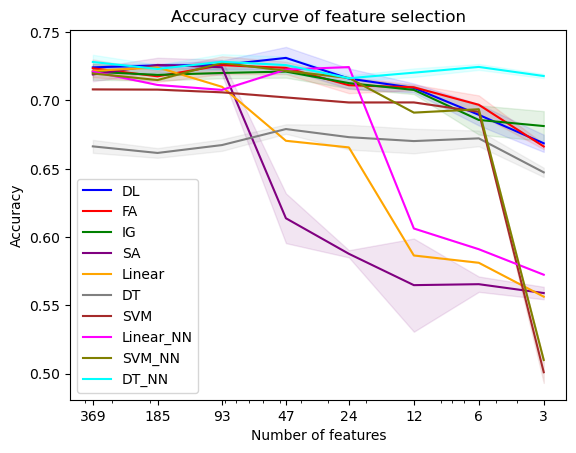

In [167]:
x = np.array([369,185,93,47,24,12,6,3])
arrays = [DL_acc, FA_acc, IG_acc, SA_acc,Linear_acc,DT_acc,SVM_acc,lin_nn_acc,SVM_nn_acc,DT_nn_acc]
colors = ['blue','red','green','purple','orange','gray','brown','magenta','olive','cyan']
labels = ['DL', 'FA', 'IG', 'SA','Linear','DT','SVM','Linear_NN','SVM_NN','DT_NN']
for i in range(len(arrays)):

    print(labels[i])
    if labels[i]=='Linear_NN' or labels[i]=='SVM_NN':
        print(arrays[i])
        mean = np.squeeze(arrays[i])
        std = 0
    else:
        stacked_arrays = np.vstack(arrays[i])
        mean = np.mean(stacked_arrays, axis=0)
        std = np.std(stacked_arrays, axis=0)
    
    plt.plot(x, mean, label=labels[i], color=colors[i])
    plt.fill_between(x, mean - std, mean + std, color=colors[i], alpha=0.1)
# Set the x-axis to logarithmic scale
plt.xscale('log')

# Set the x-ticks to specific values
plt.xticks(x, labels=[str(val) for val in x])
plt.gca().invert_xaxis()
plt.legend()
plt.title('Accuracy curve of feature selection')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.savefig('ACC_curve.png',dpi=300)

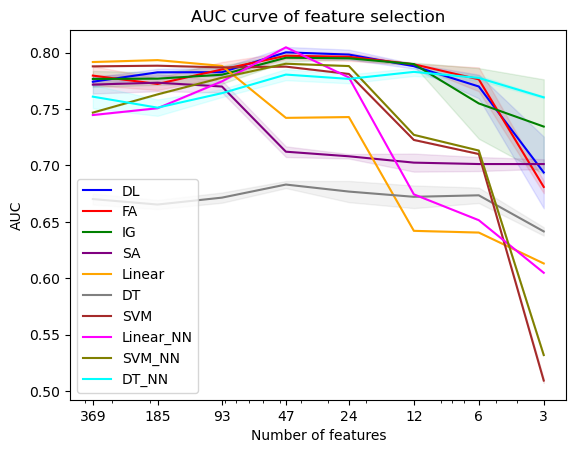

In [169]:
x = np.array([369,185,93,47,24,12,6,3])
arrays = [DL_auc, FA_auc, IG_auc, SA_auc, Linear_auc, DT_auc,SVM_auc,lin_nn_auc,SVM_nn_auc,DT_nn_auc]
colors = ['blue','red','green','purple','orange','gray','brown','magenta','olive','cyan']
labels = ['DL', 'FA', 'IG', 'SA','Linear','DT','SVM','Linear_NN','SVM_NN','DT_NN']
for i in range(len(arrays)):
    stacked_arrays = np.vstack(arrays[i])
    mean = np.mean(stacked_arrays, axis=0)
    if labels[i]=='Linear_NN' or labels[i]=='SVM_NN':
        std = 0
    else:
        std = np.std(stacked_arrays, axis=0)

    plt.plot(x, mean, label=labels[i], color=colors[i])
    plt.fill_between(x, mean - std, mean + std, color=colors[i], alpha=0.1)
# Set the x-axis to logarithmic scale
plt.xscale('log')

# Set the x-ticks to specific values
plt.xticks(x, labels=[str(val) for val in x])
plt.gca().invert_xaxis()
plt.title('AUC curve of feature selection')
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.legend()
plt.savefig('AUC_curve.png',dpi=300)

In [101]:
DT_feat[0]

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [102]:
DT_feat[1]

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177